# Статистика, DS-поток
## Задание SP.14

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.



**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание.**

Практика:
* Задача P1 &mdash; 60 баллов;
* Задача P2 &mdash; 30 баллов;

**Важность задач:**

* *высокая:* все задачи :)

In [437]:
# Bot check

# HW_ID: ds_sp14
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [438]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='Set2')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import mean_squared_error as mse

import time


---
### Задача P1.

Скачайте <a href="https://raw.githubusercontent.com/bdemeshev/em301/master/datasets/flats_moscow.txt">данные</a> о стоимости квартир в Москве.	Описание данных доступно по <a href="https://github.com/bdemeshev/em301/blob/master/datasets/flats_moscow_description.txt">ccылке</a>.
	
Обучите линейную регрессионную модель для предсказания цены квартиры от всех других параметров.

In [439]:
file_path = "flats_moscow.txt"
df = pd.read_csv(file_path, sep="\t")

X = df.drop(columns=["price"])
y = df["price"]

df.head()

,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3


In [440]:
y

0        81
1        75
2       128
3        95
4       330
       ... 
2035    110
2036     95
2037     95
2038    129
2039    103
Name: price, Length: 2040, dtype: int64

In [441]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [442]:
X_train = sm.add_constant(X_train)
model = sm.GLM(y_train, X_train, family=sm.families.Gaussian())

results = model.fit()

Проверьте гипотезы о незначимости признаков и постройте доверительные интервалы для коэффициентов модели.

Посмотрим на summary и оттуда определим значимость признаков

In [443]:
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                 1530
Model:                            GLM   Df Residuals:                     1519
Model Family:                Gaussian   Df Model:                           10
Link Function:               Identity   Scale:                          786.53
Method:                          IRLS   Log-Likelihood:                -7266.2
Date:                Sun, 15 Dec 2024   Deviance:                   1.1947e+06
Time:                        04:57:55   Pearson chi2:                 1.19e+06
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8899
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.3122      6.497     -1.895      0.0

Ожидаемо, номер квартиры (n) оказался не значимым признаком, остальные -- значимым.

In [444]:
def calculate_mse(X, y, X_test, y_test, add_const=False):
    gauss_reg = sm.GLM(y, X, family=sm.families.Gaussian())
    results_gauss_reg = gauss_reg.fit()

    if add_const:
        X_test = sm.add_constant(X_test)
    y_pred = results_gauss_reg.predict(X_test)

    mse_val = mse(y_test, y_pred)
    print(f"MSE={mse_val:.2f}")
    return mse_val;

Посчитаем, насколько хороша наша модель

In [445]:
calculate_mse(X_train, y_train, X_test, y_test, add_const=True)

MSE=1082.19


np.float64(1082.189027104824)

Определите признаки желаемой для себя квартиры в Москве и постройте предсказательный интервал ее цены.

In [446]:
wished_flat = pd.DataFrame({
    "const":[1],
    "n":[1],
    "totsp":[100],
    "livesp":[80],
    "kitsp":[25],
    "dist":[5],
    "metrdist":[4],
    "walk":[1],
    "brick":[1],
    "floor":[0],
    "code":[5],
})

prediction = results.get_prediction(wished_flat.iloc[0])
predicted_interval = prediction.conf_int()


print(f"Желаемая квартира будет стоить(в $1000) в районе [{int(predicted_interval[0][0])}, {int(predicted_interval[0][1])}]")

print("Характеристики желаемой квартиры")

wished_flat = wished_flat.drop(columns=["const"])
wished_flat

Желаемая квартира будет стоить(в $1000) в районе [246, 277]
Характеристики желаемой квартиры


,n,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,100,80,25,5,4,1,1,0,5


In [447]:
params = np.array(results.params)
params_prod = params.T @ params
params_prod

np.float64(334.6163109143706)

In [448]:
n, d = X_train.shape
n, d

(1530, 11)

Зафиксируйте все параметры, кроме площади квартиры и постройте доверительную ленту для цены квартиры. Также постройте предсказательную ленту.

In [449]:
wished_flat = pd.concat([pd.DataFrame({"const": [1] * len(wished_flat)}), wished_flat], axis=1)

totsp_values = np.arange(20, 210, 10)
flats = pd.concat([
    wished_flat.assign(totsp=totsp) for totsp in totsp_values
], ignore_index=True)

wished_flat = wished_flat.drop(columns=["const"])

predictions = []
alpha = 0.05
z = sps.t.ppf(1 - alpha / 2, n-d) 

for i, flat in flats.iterrows():
    prediction = results.get_prediction(flat)
    predicted_conf_interval = prediction.conf_int()
    
    mean = prediction.predicted_mean[0]
    tmp_flat = np.array(flat)
    lower_bound = mean - z * prediction.se_mean[0] * np.sqrt(1 + tmp_flat.T @ tmp_flat / params_prod)
    upper_bound = mean + z * prediction.se_mean[0] * np.sqrt(1 + tmp_flat.T @ tmp_flat / params_prod)
    
    predictions.append({
        "totsp": flat["totsp"],
        "predicted_price": mean.round(1),
        "lower_bound": predicted_conf_interval[0, 0].round(1),
        "upper_bound": predicted_conf_interval[0, 1].round(1),
        "predicted_pred_lower": lower_bound.round(1),
        "predicted_pred_upper": upper_bound.round(1)
    })

predicted_df = pd.DataFrame(predictions)

predicted_df.head()

,totsp,predicted_price,lower_bound,upper_bound,predicted_pred_lower,predicted_pred_upper
0,20,132.2,97.6,166.8,-35.3,299.7
1,30,148.4,116.3,180.5,-12.0,308.7
2,40,164.6,135.0,194.2,10.5,318.7
3,50,180.8,153.6,208.0,32.6,329.0
4,60,197.0,172.2,221.8,54.7,339.3


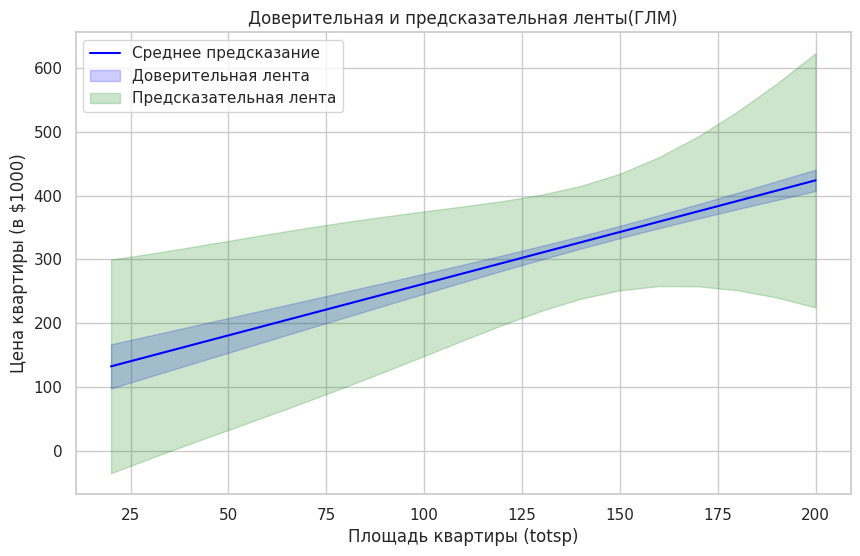

In [450]:
mean_pred = predicted_df["predicted_price"]

plt.figure(figsize=(10, 6))
plt.plot(totsp_values, mean_pred, label="Среднее предсказание", color="blue")
plt.fill_between(
    totsp_values,
    predicted_df["lower_bound"],
    predicted_df["upper_bound"],
    color="blue",
    alpha=0.2,
    label="Доверительная лента",
)
plt.fill_between(
    totsp_values,
    predicted_df["predicted_pred_lower"],
    predicted_df["predicted_pred_upper"],
    color="green",
    alpha=0.2,
    label="Предсказательная лента",
)
plt.xlabel("Площадь квартиры (totsp)")
plt.ylabel("Цена квартиры (в $1000)")
plt.title("Доверительная и предсказательная ленты(ГЛМ)")
plt.legend()
plt.show()

Теперь постройте доверительную и предсказательную ленты методом бутстрепа.

In [451]:
def compute_confidence_interval(sample, model, bootstrap_samples_cnt=10000, alpha=0.95):
    rows, cols = sample.shape
    bootstrap_samples = []

    for _ in range(bootstrap_samples_cnt):
        sample_indices = np.random.choice(rows, size=rows, replace=True)

        bootstrap_sample = sample[sample_indices]
        bootstrap_samples.append(bootstrap_sample)

    bootstrap_samples = np.array(bootstrap_samples)

    prices = []
    for bootstrap_sample in bootstrap_samples:
        prices_predictions = model.get_prediction(bootstrap_sample)
        prices.append(prices_predictions.predicted_mean)

    prices = np.array(prices)
    mean = np.mean(model.get_prediction(sample).predicted_mean)

    var_est_bootstrap = np.sqrt(prices.mean(axis=1).var(axis=0))

    mean_est_bootstrap = prices.mean(axis=1)

    z_alpha = sps.norm.ppf((1 + alpha) / 2)
    q_plus_alpha = np.percentile(mean_est_bootstrap, (1 + alpha) / 2)
    q_minus_alpha = np.percentile(mean_est_bootstrap, (1 - alpha) / 2)

    norm_interval = (
        mean - z_alpha * var_est_bootstrap,
        mean + z_alpha * var_est_bootstrap,
    )
    central_interval = (2 * mean - q_plus_alpha, 2 * mean - q_minus_alpha)
    q_interval = (q_minus_alpha, q_plus_alpha)

    return norm_interval, central_interval, q_interval

In [452]:
wished_flat_np = np.array(wished_flat).squeeze()
tmp_flats = np.array(flats)

norm_interval, central_interval, q_interval = compute_confidence_interval(
    tmp_flats, results, bootstrap_samples_cnt=3
)

print(f"Доверительный интервал: ({norm_interval[0]:.1f}, {norm_interval[1]:.1f})")
print(f"Предсказательный интервал: ({q_interval[0]:.1f}, {q_interval[1]:.1f})")


Доверительный интервал: (258.6, 297.4)
Предсказательный интервал: (285.7, 286.0)


**Вывод:**

Мы в очередной раз исследовали принципы работы ГЛМ. С ее помощью определили значимые признаки, а также построили довертельный и предсказательный интервалы.

Также используя метод бутстрепа мы снова нашли доверительный и пресказательный интервалы.

---
### Задача P2.

Пусть $X_1,\ldots,X_n$ &mdash; выборка из пуассоновского распределения с параметром $\theta$. Реализуйте следующие итерационные процедуры поиска оценки максимального правдоподобия параметра $\theta$:
* градиентный спуск, используя обычный градиент;
* градиентный спуск, используя натуральный градиент;
* метод Ньютона.

Сравните данные методы по количеству итераций до сходимости и времени работы процедуры. Считайте, что метод сошелся если отклонение от истинного значения $\theta$ меньше порога.

Все формулы приведены в ST.14 №2

In [464]:
THETA = 5
THRESHOLD = 1e-3
N = 10000

X = sps.poisson(THETA).rvs(size = N)
theta = 10

GD

In [465]:
def gradient_decsent(X, theta, lr=1e-5, treshold=THRESHOLD, true_theta=THETA):
    n_iter = 0
    size = len(X)
    mean = np.mean(X)

    start_time = time.time()

    while np.abs(true_theta - theta) > treshold:
        if n_iter > 1e6:
            print("Метод разошелся")
            break
        n_iter += 1
        theta += lr * (size * mean / theta - size)

    end_time = time.time()

    elapsed_time = end_time - start_time

    return n_iter, theta, elapsed_time


n_iter, final_theta, elapsed_time = gradient_decsent(
    X, theta, lr=1e-5, treshold=THRESHOLD, true_theta=THETA
)

print(" " * 10 + "GD")
print(f"\nКоличество итераций: {n_iter}")
print(f"Конечное значение theta: {final_theta}")
print(f"Время выполнения: {elapsed_time:.4f} секунд")

          GD

Количество итераций: 441
Конечное значение theta: 5.000965563285802
Время выполнения: 0.0020 секунд


Natural GD

In [466]:
def natural_gradient_decsent(X, theta, lr=1e-5, treshold=THRESHOLD, true_theta=THETA):
    n_iter = 0
    size = len(X)
    mean = np.mean(X)

    start_time = time.time()

    while np.abs(true_theta - theta) > treshold:
        if n_iter > 1e6:
            print("Метод разошелся")
            break
        n_iter += 1
        theta += lr * (size * mean  - size * theta)

    end_time = time.time()

    elapsed_time = end_time - start_time

    return n_iter, theta, elapsed_time

n_iter, final_theta, elapsed_time = natural_gradient_decsent(
    X, theta, lr=1e-5, treshold=THRESHOLD, true_theta=THETA
)

print(" " * 10 + "natural GD")
print(f"\nКоличество итераций: {n_iter}")
print(f"Конечное значение theta: {final_theta}")
print(f"Время выполнения: {elapsed_time:.4f} секунд")

          natural GD

Количество итераций: 75
Конечное значение theta: 5.000950275414811
Время выполнения: 0.0003 секунд


Метод Ньютона

In [467]:
def newton_method(X, theta, lr=1e-5, treshold=THRESHOLD, true_theta=THETA):
    n_iter = 0
    size = len(X)
    mean = np.mean(X)

    start_time = time.time()

    while np.abs(true_theta - theta) > treshold:
        if n_iter > 1e6:
            print("Метод разошелся")
            break
        # time.sleep(0.1)
        # print(theta, end='\r')
        n_iter += 1
        theta += lr * (theta - theta ** 2 / mean)

    end_time = time.time()

    elapsed_time = end_time - start_time

    return n_iter, theta, elapsed_time

n_iter, final_theta, elapsed_time = newton_method(
    X, theta, lr=1e-1, treshold=THRESHOLD, true_theta=THETA
)

print(" " * 10 + "Newton")
print(f"\nКоличество итераций: {n_iter}")
print(f"Конечное значение theta: {final_theta}")
print(f"Время выполнения: {elapsed_time:.4f} секунд")

          Newton

Количество итераций: 68
Конечное значение theta: 5.00088724727736
Время выполнения: 0.0006 секунд


**Вывод:**

Как видим, натуральному градиенту нужно значительно меньше времени, чем градиенту.

В тоже время, метод Ньютона оказался более эффективным, чем натуральный градиент, но как упоминалось в теории, для метода Ньютона важно откуда мы начинаем, в отличии от обычных градиентных методов.